In [1]:
import os
import os.path
import glob
import numpy as np
import Image,leargist
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import svm

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
import sklearn_evaluation.plot as skplot
from sklearn.model_selection import learning_curve

import matplotlib.pyplot as plt
import matplotlib.cm as colormap
plt.rcParams['image.cmap'] = 'Paired'

import numpy as np
np.random.seed(1)

In [2]:
imagedir = "Datasets/malimg_paper_dataset_imgs"

In [3]:
cur_dir = os.getcwd()
os.chdir(imagedir)  # the parent folder with sub-folders

# Get number of samples per family
list_fams = sorted(os.listdir(os.getcwd()), key=str.lower)  # vector of strings with family names
no_imgs = []  # No. of samples per family
for i in range(len(list_fams)):
    os.chdir(list_fams[i])
    len1 = len(glob.glob('*.png'))  # assuming the images are stored as 'png'
    no_imgs.append(len1)
    os.chdir('..')
num_samples = np.sum(no_imgs)  # total number of all samples

# Compute the labels
y = np.zeros(num_samples)
pos = 0
label = 0
for i in no_imgs:
    print ("Label:%2d\tFamily: %15s\tNumber of images: %d" % (label, list_fams[label], i))
    for j in range(i):
        y[pos] = label
        pos += 1
    label += 1
num_classes = label

# Compute the features
X = np.zeros((num_samples, 320))
cnt = 0
list_paths = [] # List of image paths
print("Processing images ...")
for i in range(len(list_fams)):
    for img_file in glob.glob(list_fams[i]+'/*.png'):
        #print("[%d] Processing image: %s" % (cnt, img_file))
        im = Image.open(img_file)
        im1 = im.resize((64,64),Image.ANTIALIAS); # for faster computation
        des = leargist.color_gist(im1)
        X[cnt] = des[0:320]
        cnt += 1
print("Images processed: %d" %(cnt))

os.chdir(cur_dir)

Label: 0	Family:       Adialer.C	Number of images: 122
Label: 1	Family:       Agent.FYI	Number of images: 116
Label: 2	Family:       Allaple.A	Number of images: 2949
Label: 3	Family:       Allaple.L	Number of images: 1591
Label: 4	Family:   Alueron.gen!J	Number of images: 198
Label: 5	Family:       Autorun.K	Number of images: 106
Label: 6	Family:     C2LOP.gen!g	Number of images: 200
Label: 7	Family:         C2LOP.P	Number of images: 146
Label: 8	Family:  Dialplatform.B	Number of images: 177
Label: 9	Family:       Dontovo.A	Number of images: 162
Label:10	Family:        Fakerean	Number of images: 381
Label:11	Family:   Instantaccess	Number of images: 431
Label:12	Family:      Lolyda.AA1	Number of images: 213
Label:13	Family:      Lolyda.AA2	Number of images: 184
Label:14	Family:      Lolyda.AA3	Number of images: 123
Label:15	Family:       Lolyda.AT	Number of images: 159
Label:16	Family:     Malex.gen!J	Number of images: 136
Label:17	Family:   Obfuscator.AD	Number of images: 142
Label:18

In [4]:
X.shape

(9339, 320)

In [5]:
# Training top_model
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=1)

top_model = GridSearchCV(svm.SVC(), param_grid=param_grid, cv=cv, verbose=10, n_jobs=20)
top_model.fit(X,y)  # Training 

Fitting 5 folds for each of 169 candidates, totalling 845 fits
[CV] C=0.01, gamma=1e-09 .............................................
[CV] C=0.01, gamma=1e-09 .............................................
[CV] C=0.01, gamma=1e-09 .............................................
[CV] C=0.01, gamma=1e-09 .............................................
[CV] C=0.01, gamma=1e-09 .............................................
[CV] C=0.01, gamma=1e-08 .............................................
[CV] C=0.01, gamma=1e-08 .............................................
[CV] C=0.01, gamma=1e-08 .............................................
[CV] C=0.01, gamma=1e-08 .............................................
[CV] C=0.01, gamma=1e-08 .............................................
[CV] C=0.01, gamma=1e-07 .............................................
[CV] C=0.01, gamma=1e-07 .............................................
[CV] C=0.01, gamma=1e-07 .............................................
[CV] C=0.01, g

[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:  2.6min


[CV] .............. C=0.01, gamma=1e-08, score=0.315846, total= 1.7min
[CV] C=0.01, gamma=1e-05 .............................................
[CV] .............. C=0.01, gamma=1e-08, score=0.315846, total= 1.7min
[CV] C=0.01, gamma=1e-05 .............................................
[CV] .............. C=0.01, gamma=1e-09, score=0.315846, total= 1.7min
[CV] C=0.01, gamma=1e-05 .............................................
[CV] .............. C=0.01, gamma=1e-07, score=0.315846, total= 1.7min
[CV] C=0.01, gamma=1e-05 .............................................
[CV] .............. C=0.01, gamma=1e-09, score=0.315846, total= 1.7min
[CV] C=0.01, gamma=0.0001 ............................................
[CV] .............. C=0.01, gamma=1e-08, score=0.315846, total= 1.8min
[CV] C=0.01, gamma=0.0001 ............................................
[CV] .............. C=0.01, gamma=1e-07, score=0.315846, total= 1.7min
[CV] C=0.01, gamma=0.0001 ............................................
[CV] .

[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:  2.9min


[CV] .............. C=0.01, gamma=1e-08, score=0.315846, total= 1.8min
[CV] C=0.01, gamma=0.001 .............................................
[CV] .............. C=0.01, gamma=1e-09, score=0.315846, total= 1.8min
[CV] C=0.01, gamma=0.001 .............................................
[CV] .............. C=0.01, gamma=1e-06, score=0.315846, total= 1.8min
[CV] C=0.01, gamma=0.001 .............................................
[CV] .............. C=0.01, gamma=1e-07, score=0.315846, total= 1.8min
[CV] C=0.01, gamma=0.001 .............................................
[CV] .............. C=0.01, gamma=1e-07, score=0.315846, total= 1.8min
[CV] C=0.01, gamma=0.001 .............................................
[CV] .............. C=0.01, gamma=1e-06, score=0.315846, total= 1.8min
[CV] C=0.01, gamma=0.01 ..............................................
[CV] .............. C=0.01, gamma=1e-06, score=0.315846, total= 1.8min
[CV] C=0.01, gamma=0.01 ..............................................
[CV] .

[Parallel(n_jobs=20)]: Done  21 tasks      | elapsed:  5.4min


[CV] .............. C=0.01, gamma=1e-05, score=0.315846, total= 1.7min
[CV] C=0.01, gamma=0.1 ...............................................
[CV] .............. C=0.01, gamma=1e-05, score=0.315846, total= 1.7min
[CV] C=0.01, gamma=0.1 ...............................................
[CV] .............. C=0.01, gamma=1e-05, score=0.315846, total= 1.7min
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ............. C=0.01, gamma=0.0001, score=0.315846, total= 1.7min
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ............. C=0.01, gamma=0.0001, score=0.315846, total= 1.7min
[CV] C=0.01, gamma=1.0 ...............................................
[CV] ............. C=0.01, gamma=0.0001, score=0.315846, total= 1.7min
[CV] C=0.01, gamma=1.0 ...............................................
[CV] ............. C=0.01, gamma=0.0001, score=0.315846, total= 1.7min
[CV] C=0.01, gamma=1.0 ...............................................
[CV] .

[Parallel(n_jobs=20)]: Done  32 tasks      | elapsed:  5.9min


[CV] .............. C=0.01, gamma=0.001, score=0.315846, total= 1.8min
[CV] C=0.01, gamma=10.0 ..............................................
[CV] .............. C=0.01, gamma=0.001, score=0.315846, total= 1.9min
[CV] C=0.01, gamma=10.0 ..............................................
[CV] ............... C=0.01, gamma=0.01, score=0.315846, total= 1.7min
[CV] C=0.01, gamma=10.0 ..............................................
[CV] .............. C=0.01, gamma=0.001, score=0.315846, total= 1.9min
[CV] C=0.01, gamma=100.0 .............................................
[CV] ............... C=0.01, gamma=0.01, score=0.315846, total= 1.9min
[CV] C=0.01, gamma=100.0 .............................................
[CV] ............... C=0.01, gamma=0.01, score=0.315846, total= 1.8min
[CV] C=0.01, gamma=100.0 .............................................
[CV] ............... C=0.01, gamma=0.01, score=0.315846, total= 1.9min
[CV] C=0.01, gamma=100.0 .............................................
[CV] .

[Parallel(n_jobs=20)]: Done  45 tasks      | elapsed:  8.3min


[CV] ................ C=0.01, gamma=0.1, score=0.315846, total= 1.8min
[CV] C=0.1, gamma=1e-09 ..............................................
[CV] ................ C=0.01, gamma=1.0, score=0.536403, total= 1.7min
[CV] C=0.1, gamma=1e-09 ..............................................
[CV] ................ C=0.01, gamma=0.1, score=0.315846, total= 1.7min
[CV] C=0.1, gamma=1e-09 ..............................................
[CV] ................ C=0.01, gamma=0.1, score=0.315846, total= 1.7min
[CV] C=0.1, gamma=1e-09 ..............................................
[CV] ................ C=0.01, gamma=0.1, score=0.315846, total= 1.8min
[CV] C=0.1, gamma=1e-09 ..............................................
[CV] ............... C=0.01, gamma=10.0, score=0.671842, total= 1.6min
[CV] C=0.1, gamma=1e-08 ..............................................
[CV] ................ C=0.01, gamma=1.0, score=0.535332, total= 1.6min
[CV] C=0.1, gamma=1e-08 ..............................................
[CV] .

[Parallel(n_jobs=20)]: Done  58 tasks      | elapsed:  9.6min


[CV] .............. C=0.01, gamma=100.0, score=0.447537, total= 2.7min
[CV] C=0.1, gamma=1e-07 ..............................................
[CV] .............. C=0.01, gamma=100.0, score=0.449679, total= 2.7min
[CV] C=0.1, gamma=1e-07 ..............................................
[CV] ............... C=0.1, gamma=1e-09, score=0.315846, total= 1.8min
[CV] C=0.1, gamma=1e-06 ..............................................
[CV] ............... C=0.1, gamma=1e-09, score=0.315846, total= 1.8min
[CV] C=0.1, gamma=1e-06 ..............................................
[CV] ............... C=0.1, gamma=1e-08, score=0.315846, total= 1.7min
[CV] C=0.1, gamma=1e-06 ..............................................
[CV] ............... C=0.1, gamma=1e-09, score=0.315846, total= 1.8min
[CV] C=0.1, gamma=1e-06 ..............................................
[CV] ............... C=0.1, gamma=1e-08, score=0.315846, total= 1.8min
[CV] C=0.1, gamma=1e-06 ..............................................
[CV] .

[Parallel(n_jobs=20)]: Done  73 tasks      | elapsed: 12.6min


[CV] ............... C=0.1, gamma=1e-07, score=0.315846, total= 1.9min
[CV] C=0.1, gamma=0.0001 .............................................
[CV] ............... C=0.1, gamma=1e-07, score=0.315846, total= 1.9min
[CV] C=0.1, gamma=0.0001 .............................................
[CV] ............... C=0.1, gamma=1e-06, score=0.315846, total= 1.7min
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............... C=0.1, gamma=1e-06, score=0.315846, total= 1.8min
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............... C=0.1, gamma=1e-06, score=0.315846, total= 1.8min
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............... C=0.1, gamma=1e-05, score=0.315846, total= 1.8min
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............... C=0.1, gamma=1e-05, score=0.315846, total= 1.8min
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[Parallel(n_jobs=20)]: Done  88 tasks      | elapsed: 14.9min


[CV] ............. C=0.01, gamma=1000.0, score=0.433084, total= 5.5min
[CV] C=0.1, gamma=0.1 ................................................
[CV] ............. C=0.01, gamma=1000.0, score=0.434690, total= 5.6min
[CV] C=0.1, gamma=0.1 ................................................
[CV] .............. C=0.1, gamma=0.0001, score=0.315846, total= 1.7min
[CV] C=0.1, gamma=1.0 ................................................
[CV] .............. C=0.1, gamma=0.0001, score=0.315846, total= 1.7min
[CV] C=0.1, gamma=1.0 ................................................
[CV] .............. C=0.1, gamma=0.0001, score=0.315846, total= 1.9min
[CV] C=0.1, gamma=1.0 ................................................
[CV] .............. C=0.1, gamma=0.0001, score=0.315846, total= 1.8min
[CV] C=0.1, gamma=1.0 ................................................
[CV] .............. C=0.1, gamma=0.0001, score=0.315846, total= 1.9min
[CV] C=0.1, gamma=1.0 ................................................
[CV] .

[Parallel(n_jobs=20)]: Done 105 tasks      | elapsed: 17.2min


[CV] ................. C=0.1, gamma=0.1, score=0.584582, total= 1.4min
[CV] C=0.1, gamma=1000.0 .............................................
[CV] ................ C=0.1, gamma=0.01, score=0.315846, total= 1.9min
[CV] C=0.1, gamma=1000.0 .............................................
[CV] ................ C=0.1, gamma=0.01, score=0.315846, total= 1.9min
[CV] C=0.1, gamma=1000.0 .............................................
[CV] ................ C=0.1, gamma=0.01, score=0.315846, total= 1.9min
[CV] C=0.1, gamma=1000.0 .............................................
[CV] ................. C=0.1, gamma=0.1, score=0.585118, total= 1.5min
[CV] C=0.1, gamma=1000.0 .............................................
[CV] ................. C=0.1, gamma=1.0, score=0.902034, total=  53.1s
[CV] C=1.0, gamma=1e-09 ..............................................
[CV] ................. C=0.1, gamma=1.0, score=0.892398, total=  52.1s
[CV] C=1.0, gamma=1e-09 ..............................................
[CV] .

[Parallel(n_jobs=20)]: Done 122 tasks      | elapsed: 20.2min


[CV] ............... C=1.0, gamma=1e-09, score=0.315846, total= 1.9min
[CV] C=1.0, gamma=1e-07 ..............................................
[CV] ............... C=1.0, gamma=1e-09, score=0.315846, total= 1.9min
[CV] C=1.0, gamma=1e-07 ..............................................
[CV] ............... C=1.0, gamma=1e-09, score=0.315846, total= 2.0min
[CV] C=1.0, gamma=1e-07 ..............................................
[CV] ............... C=0.1, gamma=100.0, score=0.739829, total= 2.5min
[CV] C=1.0, gamma=1e-06 ..............................................
[CV] ............... C=1.0, gamma=1e-08, score=0.315846, total= 1.7min
[CV] C=1.0, gamma=1e-06 ..............................................
[CV] ............... C=1.0, gamma=1e-08, score=0.315846, total= 1.7min
[CV] C=1.0, gamma=1e-06 ..............................................
[CV] ............... C=1.0, gamma=1e-08, score=0.315846, total= 1.6min
[CV] C=1.0, gamma=1e-06 ..............................................
[CV] .

[Parallel(n_jobs=20)]: Done 141 tasks      | elapsed: 23.3min


[CV] ............... C=1.0, gamma=1e-06, score=0.315846, total= 1.8min
[CV] C=1.0, gamma=0.001 ..............................................
[CV] ............... C=1.0, gamma=1e-07, score=0.315846, total= 1.9min
[CV] C=1.0, gamma=0.001 ..............................................
[CV] ............... C=1.0, gamma=1e-07, score=0.315846, total= 1.9min
[CV] C=1.0, gamma=0.001 ..............................................
[CV] ............... C=1.0, gamma=1e-05, score=0.315846, total= 1.8min
[CV] C=1.0, gamma=0.001 ..............................................
[CV] ............... C=1.0, gamma=1e-07, score=0.315846, total= 1.9min
[CV] C=1.0, gamma=0.01 ...............................................
[CV] ............... C=1.0, gamma=1e-05, score=0.315846, total= 2.0min
[CV] C=1.0, gamma=0.01 ...............................................
[CV] ............... C=1.0, gamma=1e-05, score=0.315846, total= 2.0min
[CV] C=1.0, gamma=0.01 ...............................................
[CV] .

[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed: 26.5min


[CV] ................. C=1.0, gamma=0.1, score=0.897752, total= 1.0min
[CV] C=1.0, gamma=10.0 ...............................................
[CV] ................ C=1.0, gamma=0.01, score=0.585653, total= 1.4min
[CV] C=1.0, gamma=10.0 ...............................................
[CV] ................ C=1.0, gamma=0.01, score=0.592077, total= 1.6min
[CV] C=1.0, gamma=10.0 ...............................................
[CV] .............. C=1.0, gamma=0.0001, score=0.315846, total= 2.2min
[CV] C=1.0, gamma=10.0 ...............................................
[CV] ................ C=1.0, gamma=0.01, score=0.583512, total= 1.5min
[CV] C=1.0, gamma=10.0 ...............................................
[CV] ................. C=1.0, gamma=0.1, score=0.904711, total= 1.0min
[CV] C=1.0, gamma=100.0 ..............................................
[CV] ................. C=1.0, gamma=0.1, score=0.897752, total=  59.7s
[CV] C=1.0, gamma=100.0 ..............................................
[CV] .

[Parallel(n_jobs=20)]: Done 181 tasks      | elapsed: 27.3min


[CV] ................ C=1.0, gamma=10.0, score=0.970557, total=  20.4s
[CV] C=10.0, gamma=1e-08 .............................................
[CV] ................ C=1.0, gamma=10.0, score=0.968951, total=  24.7s
[CV] C=10.0, gamma=1e-08 .............................................
[CV] ................ C=1.0, gamma=10.0, score=0.973769, total=  24.6s
[CV] C=10.0, gamma=1e-08 .............................................
[CV] ................ C=1.0, gamma=10.0, score=0.969486, total=  27.4s
[CV] C=10.0, gamma=1e-08 .............................................
[CV] ............... C=1.0, gamma=100.0, score=0.882227, total= 2.4min
[CV] C=10.0, gamma=1e-07 .............................................
[CV] ............... C=1.0, gamma=100.0, score=0.881692, total= 2.4min
[CV] C=10.0, gamma=1e-07 .............................................
[CV] ............... C=1.0, gamma=100.0, score=0.880621, total= 2.5min
[CV] C=10.0, gamma=1e-07 .............................................
[CV] .

[Parallel(n_jobs=20)]: Done 202 tasks      | elapsed: 32.7min


[CV] .............. C=10.0, gamma=1e-07, score=0.315846, total= 1.8min
[CV] C=10.0, gamma=0.0001 ............................................
[CV] .............. C=10.0, gamma=1e-07, score=0.315846, total= 1.8min
[CV] C=10.0, gamma=0.0001 ............................................
[CV] .............. C=10.0, gamma=1e-05, score=0.315846, total= 1.8min
[CV] C=10.0, gamma=0.0001 ............................................
[CV] .............. C=10.0, gamma=1e-06, score=0.315846, total= 1.9min
[CV] C=10.0, gamma=0.001 .............................................
[CV] .............. C=1.0, gamma=1000.0, score=0.599036, total= 6.0min
[CV] C=10.0, gamma=0.001 .............................................
[CV] .............. C=1.0, gamma=1000.0, score=0.601178, total= 5.9min
[CV] C=10.0, gamma=0.001 .............................................
[CV] .............. C=10.0, gamma=1e-07, score=0.315846, total= 2.2min
[CV] C=10.0, gamma=0.001 .............................................
[CV] .

[Parallel(n_jobs=20)]: Done 225 tasks      | elapsed: 35.6min


[CV] .............. C=1.0, gamma=1000.0, score=0.600107, total= 7.5min
[CV] C=10.0, gamma=10.0 ..............................................
[CV] ................ C=10.0, gamma=1.0, score=0.970557, total=  14.7s
[CV] C=10.0, gamma=10.0 ..............................................
[CV] ................ C=10.0, gamma=1.0, score=0.968415, total=  15.0s
[CV] C=10.0, gamma=10.0 ..............................................
[CV] ................ C=10.0, gamma=0.1, score=0.967880, total=  21.9s
[CV] C=10.0, gamma=10.0 ..............................................
[CV] ................ C=10.0, gamma=0.1, score=0.957709, total=  21.1s
[CV] C=10.0, gamma=10.0 ..............................................
[CV] ................ C=10.0, gamma=1.0, score=0.972163, total=  15.8s
[CV] C=10.0, gamma=100.0 .............................................
[CV] ................ C=10.0, gamma=1.0, score=0.975375, total=  18.9s
[CV] C=10.0, gamma=100.0 .............................................
[CV] .

[Parallel(n_jobs=20)]: Done 248 tasks      | elapsed: 36.8min


[CV] .............. C=10.0, gamma=0.001, score=0.582441, total= 1.9min
[CV] C=100.0, gamma=1e-08 ............................................
[CV] .............. C=10.0, gamma=0.001, score=0.584047, total= 1.9min
[CV] C=100.0, gamma=1e-08 ............................................
[CV] .............. C=10.0, gamma=100.0, score=0.897752, total= 2.2min
[CV] C=100.0, gamma=1e-07 ............................................
[CV] .............. C=10.0, gamma=100.0, score=0.896681, total= 2.3min
[CV] C=100.0, gamma=1e-07 ............................................
[CV] ............. C=100.0, gamma=1e-09, score=0.315846, total= 1.8min
[CV] C=100.0, gamma=1e-07 ............................................
[CV] ............. C=100.0, gamma=1e-09, score=0.315846, total= 1.7min
[CV] C=100.0, gamma=1e-07 ............................................
[CV] .............. C=10.0, gamma=100.0, score=0.893469, total= 2.2min
[CV] C=100.0, gamma=1e-07 ............................................
[CV] .

[Parallel(n_jobs=20)]: Done 273 tasks      | elapsed: 42.2min


[CV] ............. C=100.0, gamma=1e-06, score=0.315846, total= 1.7min
[CV] C=100.0, gamma=0.001 ............................................
[CV] ............. C=10.0, gamma=1000.0, score=0.607066, total= 5.2min
[CV] C=100.0, gamma=0.001 ............................................
[CV] ............. C=100.0, gamma=1e-06, score=0.315846, total= 2.0min
[CV] C=100.0, gamma=0.01 .............................................
[CV] ............. C=100.0, gamma=1e-06, score=0.315846, total= 2.0min
[CV] C=100.0, gamma=0.01 .............................................
[CV] ............. C=100.0, gamma=0.001, score=0.899358, total=  41.1s
[CV] C=100.0, gamma=0.01 .............................................
[CV] ............. C=100.0, gamma=1e-05, score=0.315846, total= 1.8min
[CV] C=100.0, gamma=0.01 .............................................
[CV] ............. C=100.0, gamma=1e-05, score=0.315846, total= 1.9min
[CV] C=100.0, gamma=0.01 .............................................
[CV] .

[Parallel(n_jobs=20)]: Done 298 tasks      | elapsed: 43.7min


[CV] .............. C=100.0, gamma=0.01, score=0.957709, total=  16.5s
[CV] C=100.0, gamma=100.0 ............................................
[CV] ............. C=10.0, gamma=1000.0, score=0.604925, total= 6.5min
[CV] C=100.0, gamma=100.0 ............................................
[CV] .............. C=100.0, gamma=0.01, score=0.963062, total=  16.8s
[CV] C=100.0, gamma=1000.0 ...........................................
[CV] ............... C=100.0, gamma=1.0, score=0.969486, total=   8.3s
[CV] C=100.0, gamma=1000.0 ...........................................
[CV] ............... C=100.0, gamma=1.0, score=0.970557, total=   7.9s
[CV] C=100.0, gamma=1000.0 ...........................................
[CV] ............... C=100.0, gamma=0.1, score=0.968415, total=   9.1s
[CV] C=100.0, gamma=1000.0 ...........................................
[CV] ............... C=100.0, gamma=1.0, score=0.975910, total=   7.3s
[CV] C=100.0, gamma=1000.0 ...........................................
[CV] .

[Parallel(n_jobs=20)]: Done 325 tasks      | elapsed: 46.6min


[CV] ............. C=100.0, gamma=100.0, score=0.896681, total= 2.3min
[CV] C=1000.0, gamma=1e-05 ...........................................
[CV] ............ C=1000.0, gamma=1e-09, score=0.315846, total= 1.7min
[CV] C=1000.0, gamma=1e-05 ...........................................
[CV] ............ C=1000.0, gamma=1e-09, score=0.315846, total= 1.7min
[CV] C=1000.0, gamma=1e-05 ...........................................
[CV] ............ C=1000.0, gamma=1e-09, score=0.315846, total= 1.7min
[CV] C=1000.0, gamma=1e-05 ...........................................
[CV] ............ C=1000.0, gamma=1e-08, score=0.315846, total= 1.7min
[CV] C=1000.0, gamma=1e-05 ...........................................
[CV] ............ C=1000.0, gamma=1e-07, score=0.315846, total= 1.5min
[CV] C=1000.0, gamma=0.0001 ..........................................
[CV] ............ C=1000.0, gamma=1e-07, score=0.315846, total= 1.6min
[CV] C=1000.0, gamma=0.0001 ..........................................
[CV] .

[Parallel(n_jobs=20)]: Done 352 tasks      | elapsed: 49.7min


[CV] .............. C=1000.0, gamma=0.1, score=0.976445, total=   6.5s
[CV] C=1000.0, gamma=1.0 .............................................
[CV] ............. C=1000.0, gamma=0.01, score=0.966809, total=   8.9s
[CV] C=1000.0, gamma=1.0 .............................................
[CV] ............. C=1000.0, gamma=0.01, score=0.967345, total=  10.1s
[CV] C=1000.0, gamma=1.0 .............................................
[CV] ........... C=1000.0, gamma=0.0001, score=0.899358, total=  38.2s
[CV] C=1000.0, gamma=10.0 ............................................
[CV] .............. C=1000.0, gamma=0.1, score=0.969486, total=  10.4s
[CV] C=1000.0, gamma=10.0 ............................................
[CV] .............. C=1000.0, gamma=0.1, score=0.971627, total=  10.1s
[CV] C=1000.0, gamma=10.0 ............................................
[CV] .............. C=1000.0, gamma=0.1, score=0.971627, total=   6.3s
[CV] C=1000.0, gamma=10.0 ............................................
[CV] .

[Parallel(n_jobs=20)]: Done 381 tasks      | elapsed: 53.0min


[CV] C=10000.0, gamma=1e-07 ..........................................
[CV] ........... C=10000.0, gamma=1e-09, score=0.315846, total= 1.7min
[CV] C=10000.0, gamma=1e-07 ..........................................
[CV] ............ C=1000.0, gamma=100.0, score=0.896681, total= 2.5min
[CV] C=10000.0, gamma=1e-07 ..........................................
[CV] ............ C=1000.0, gamma=100.0, score=0.899893, total= 2.5min
[CV] C=10000.0, gamma=1e-07 ..........................................
[CV] ........... C=10000.0, gamma=1e-09, score=0.315846, total= 1.8min
[CV] C=10000.0, gamma=1e-06 ..........................................
[CV] ............ C=1000.0, gamma=100.0, score=0.897752, total= 2.5min
[CV] C=10000.0, gamma=1e-06 ..........................................
[CV] ............ C=1000.0, gamma=100.0, score=0.896681, total= 2.6min
[CV] C=10000.0, gamma=1e-06 ..........................................
[CV] ........... C=10000.0, gamma=1e-09, score=0.315846, total= 1.8min
[CV] C

[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed: 56.1min


[CV] ........... C=10000.0, gamma=1e-07, score=0.315846, total= 2.1min
[CV] C=10000.0, gamma=0.1 ............................................
[CV] ........... C=10000.0, gamma=1e-06, score=0.582441, total= 1.9min
[CV] C=10000.0, gamma=0.1 ............................................
[CV] ........... C=10000.0, gamma=0.001, score=0.966809, total=   7.1s
[CV] C=10000.0, gamma=0.1 ............................................
[CV] ........... C=10000.0, gamma=0.001, score=0.968415, total=   7.3s
[CV] C=10000.0, gamma=0.1 ............................................
[CV] ........... C=10000.0, gamma=0.001, score=0.973769, total=   7.8s
[CV] C=10000.0, gamma=0.1 ............................................
[CV] ........... C=10000.0, gamma=1e-06, score=0.584047, total= 1.8min
[CV] C=10000.0, gamma=1.0 ............................................
[CV] ........... C=10000.0, gamma=1e-07, score=0.315846, total= 2.2min
[CV] C=10000.0, gamma=1.0 ............................................
[CV] .

[Parallel(n_jobs=20)]: Done 441 tasks      | elapsed: 57.0min


[CV] ........... C=1000.0, gamma=1000.0, score=0.604925, total= 6.3min
[CV] C=100000.0, gamma=1e-08 .........................................
[CV] ........... C=1000.0, gamma=1000.0, score=0.604390, total= 6.3min
[CV] C=100000.0, gamma=1e-08 .........................................
[CV] ........... C=1000.0, gamma=1000.0, score=0.607066, total= 6.4min
[CV] C=100000.0, gamma=1e-08 .........................................
[CV] ........... C=1000.0, gamma=1000.0, score=0.604925, total= 6.6min
[CV] C=100000.0, gamma=1e-08 .........................................
[CV] ........... C=10000.0, gamma=100.0, score=0.896681, total= 1.8min
[CV] C=100000.0, gamma=1e-07 .........................................
[CV] ........... C=10000.0, gamma=100.0, score=0.899893, total= 1.8min
[CV] C=100000.0, gamma=1e-07 .........................................
[CV] ........... C=10000.0, gamma=100.0, score=0.893469, total= 1.8min
[CV] C=100000.0, gamma=1e-07 .........................................
[CV] .

[Parallel(n_jobs=20)]: Done 472 tasks      | elapsed: 61.9min


[CV] ......... C=100000.0, gamma=0.0001, score=0.967345, total=   9.9s
[CV] C=100000.0, gamma=0.01 ..........................................
[CV] .......... C=100000.0, gamma=1e-07, score=0.511777, total= 1.9min
[CV] C=100000.0, gamma=0.01 ..........................................
[CV] .......... C=100000.0, gamma=0.001, score=0.968951, total=   9.1s
[CV] C=100000.0, gamma=0.01 ..........................................
[CV] .......... C=100000.0, gamma=1e-07, score=0.515525, total= 2.0min
[CV] C=100000.0, gamma=0.1 ...........................................
[CV] .......... C=100000.0, gamma=0.001, score=0.972698, total=  10.8s
[CV] C=100000.0, gamma=0.1 ...........................................
[CV] .......... C=100000.0, gamma=0.001, score=0.975910, total=   9.0s
[CV] C=100000.0, gamma=0.1 ...........................................
[CV] .......... C=100000.0, gamma=1e-07, score=0.510171, total= 2.0min
[CV] C=100000.0, gamma=0.1 ...........................................
[CV] .

[Parallel(n_jobs=20)]: Done 505 tasks      | elapsed: 62.9min


[CV] .......... C=10000.0, gamma=1000.0, score=0.604390, total= 5.9min
[CV] C=1000000.0, gamma=1e-08 ........................................
[CV] .......... C=10000.0, gamma=1000.0, score=0.607066, total= 5.9min
[CV] C=1000000.0, gamma=1e-08 ........................................
[CV] .......... C=10000.0, gamma=1000.0, score=0.604925, total= 6.4min
[CV] C=1000000.0, gamma=1e-08 ........................................
[CV] .......... C=10000.0, gamma=1000.0, score=0.604925, total= 6.4min
[CV] C=1000000.0, gamma=1e-08 ........................................
[CV] .......... C=10000.0, gamma=1000.0, score=0.599572, total= 6.5min
[CV] C=1000000.0, gamma=1e-08 ........................................
[CV] .......... C=100000.0, gamma=100.0, score=0.893469, total= 1.7min
[CV] C=1000000.0, gamma=1e-07 ........................................
[CV] .......... C=100000.0, gamma=100.0, score=0.896681, total= 1.8min
[CV] C=1000000.0, gamma=1e-07 ........................................
[CV] .

[Parallel(n_jobs=20)]: Done 538 tasks      | elapsed: 66.4min


[CV] ........ C=1000000.0, gamma=0.0001, score=0.970021, total=   6.3s
[CV] C=1000000.0, gamma=0.01 .........................................
[CV] ......... C=1000000.0, gamma=0.001, score=0.976981, total=   7.1s
[CV] C=1000000.0, gamma=0.01 .........................................
[CV] ........ C=1000000.0, gamma=0.0001, score=0.971092, total=   6.3s
[CV] C=1000000.0, gamma=0.1 ..........................................
[CV] ......... C=1000000.0, gamma=1e-06, score=0.867238, total=  26.0s
[CV] C=1000000.0, gamma=0.1 ..........................................
[CV] ......... C=1000000.0, gamma=0.001, score=0.982869, total=   8.5s
[CV] C=1000000.0, gamma=0.1 ..........................................
[CV] ......... C=1000000.0, gamma=0.001, score=0.981799, total=  10.8s
[CV] C=1000000.0, gamma=0.1 ..........................................
[CV] .......... C=1000000.0, gamma=0.01, score=0.982869, total=  12.2s
[CV] C=1000000.0, gamma=0.1 ..........................................
[CV] .

[Parallel(n_jobs=20)]: Done 573 tasks      | elapsed: 69.9min


[CV] ......... C=100000.0, gamma=1000.0, score=0.604925, total= 6.4min
[CV] C=10000000.0, gamma=1e-08 .......................................
[CV] ......... C=1000000.0, gamma=100.0, score=0.899893, total= 2.6min
[CV] C=10000000.0, gamma=1e-08 .......................................
[CV] ......... C=100000.0, gamma=1000.0, score=0.604925, total= 6.4min
[CV] C=10000000.0, gamma=1e-07 .......................................
[CV] ........ C=10000000.0, gamma=1e-09, score=0.461456, total= 1.9min
[CV] C=10000000.0, gamma=1e-07 .......................................
[CV] ........ C=10000000.0, gamma=1e-09, score=0.461456, total= 1.9min
[CV] C=10000000.0, gamma=1e-07 .......................................
[CV] ......... C=1000000.0, gamma=100.0, score=0.896681, total= 2.6min
[CV] C=10000000.0, gamma=1e-07 .......................................
[CV] ......... C=1000000.0, gamma=100.0, score=0.893469, total= 2.6min
[CV] C=10000000.0, gamma=1e-07 .......................................
[CV] .

[Parallel(n_jobs=20)]: Done 608 tasks      | elapsed: 71.7min


[CV] ........ C=10000000.0, gamma=0.001, score=0.976981, total=   8.3s
[CV] C=10000000.0, gamma=0.1 .........................................
[CV] ......... C=10000000.0, gamma=0.01, score=0.976981, total=   6.0s
[CV] C=10000000.0, gamma=0.1 .........................................
[CV] ......... C=10000000.0, gamma=0.01, score=0.982869, total=   8.4s
[CV] C=10000000.0, gamma=1.0 .........................................
[CV] ........ C=10000000.0, gamma=1e-07, score=0.709315, total=  45.3s
[CV] C=10000000.0, gamma=1.0 .........................................
[CV] ......... C=10000000.0, gamma=0.01, score=0.983940, total=   6.8s
[CV] C=10000000.0, gamma=1.0 .........................................
[CV] ......... C=10000000.0, gamma=0.01, score=0.982869, total=   5.1s
[CV] C=10000000.0, gamma=1.0 .........................................
[CV] ........ C=10000000.0, gamma=1e-08, score=0.659529, total= 1.2min
[CV] C=10000000.0, gamma=1.0 .........................................
[CV] .

[Parallel(n_jobs=20)]: Done 645 tasks      | elapsed: 75.5min


[CV] ....... C=100000000.0, gamma=1e-09, score=0.665418, total= 2.1min
[CV] C=100000000.0, gamma=1e-06 ......................................
[CV] ....... C=100000000.0, gamma=1e-09, score=0.702891, total= 1.9min
[CV] C=100000000.0, gamma=1e-06 ......................................
[CV] ....... C=100000000.0, gamma=1e-09, score=0.714668, total= 2.2min
[CV] C=100000000.0, gamma=1e-06 ......................................
[CV] ....... C=100000000.0, gamma=1e-09, score=0.659529, total= 2.0min
[CV] C=100000000.0, gamma=1e-06 ......................................
[CV] ....... C=100000000.0, gamma=1e-09, score=0.721092, total= 2.0min
[CV] C=100000000.0, gamma=1e-06 ......................................
[CV] ....... C=100000000.0, gamma=1e-08, score=0.639186, total= 2.3min
[CV] C=100000000.0, gamma=1e-05 ......................................
[CV] ....... C=100000000.0, gamma=1e-06, score=0.821734, total=  15.6s
[CV] C=100000000.0, gamma=1e-05 ......................................
[CV] .

[Parallel(n_jobs=20)]: Done 682 tasks      | elapsed: 76.9min


[CV] ......... C=100000000.0, gamma=0.1, score=0.983405, total=   5.6s
[CV] C=100000000.0, gamma=10.0 .......................................
[CV] ......... C=100000000.0, gamma=0.1, score=0.985011, total=   5.4s
[CV] C=100000000.0, gamma=10.0 .......................................
[CV] ........ C=100000000.0, gamma=0.01, score=0.982869, total=   9.1s
[CV] C=100000000.0, gamma=10.0 .......................................
[CV] ......... C=100000000.0, gamma=0.1, score=0.978587, total=   5.5s
[CV] C=100000000.0, gamma=100.0 ......................................
[CV] ......... C=100000000.0, gamma=1.0, score=0.979122, total=   5.9s
[CV] C=100000000.0, gamma=100.0 ......................................
[CV] ......... C=100000000.0, gamma=1.0, score=0.987687, total=   5.8s
[CV] C=100000000.0, gamma=100.0 ......................................
[CV] ......... C=100000000.0, gamma=0.1, score=0.983405, total=   8.5s
[CV] C=100000000.0, gamma=100.0 ......................................
[CV] .

[Parallel(n_jobs=20)]: Done 721 tasks      | elapsed: 81.4min


[CV] ...... C=1000000000.0, gamma=1e-05, score=0.980728, total=   9.9s
[CV] C=1000000000.0, gamma=0.0001 ....................................
[CV] ...... C=1000000000.0, gamma=1e-08, score=0.639722, total= 2.1min
[CV] C=1000000000.0, gamma=0.0001 ....................................
[CV] ...... C=1000000000.0, gamma=1e-06, score=0.814240, total=  19.1s
[CV] C=1000000000.0, gamma=0.0001 ....................................
[CV] ...... C=1000000000.0, gamma=1e-05, score=0.977516, total=   8.6s
[CV] C=1000000000.0, gamma=0.0001 ....................................
[CV] ...... C=1000000000.0, gamma=1e-05, score=0.980193, total=   9.9s
[CV] C=1000000000.0, gamma=0.001 .....................................
[CV] ...... C=1000000000.0, gamma=1e-05, score=0.982334, total=   8.7s
[CV] C=1000000000.0, gamma=0.001 .....................................
[CV] ...... C=1000000000.0, gamma=1e-05, score=0.978051, total=   9.0s
[CV] C=1000000000.0, gamma=0.001 .....................................
[CV] .

[Parallel(n_jobs=20)]: Done 760 tasks      | elapsed: 82.4min


[CV] ....... C=1000000000.0, gamma=10.0, score=0.980193, total=  13.6s
[CV] C=10000000000.0, gamma=1e-09 ....................................
[CV] ....... C=1000000000.0, gamma=10.0, score=0.983940, total=  13.1s
[CV] C=10000000000.0, gamma=1e-09 ....................................
[CV] ....... C=1000000000.0, gamma=10.0, score=0.983940, total=  20.8s
[CV] C=10000000000.0, gamma=1e-09 ....................................
[CV] ....... C=1000000000.0, gamma=10.0, score=0.987152, total=  21.2s
[CV] C=10000000000.0, gamma=1e-09 ....................................
[CV] ....... C=1000000000.0, gamma=10.0, score=0.984475, total=  20.3s
[CV] C=10000000000.0, gamma=1e-09 ....................................
[CV] ...... C=100000000.0, gamma=1000.0, score=0.604925, total= 5.2min
[CV] C=10000000000.0, gamma=1e-08 ....................................
[CV] ...... C=100000000.0, gamma=1000.0, score=0.607066, total= 5.2min
[CV] C=10000000000.0, gamma=1e-08 ....................................
[CV] .

[Parallel(n_jobs=20)]: Done 801 tasks      | elapsed: 86.2min


[CV] .... C=10000000000.0, gamma=0.0001, score=0.979657, total=  12.5s
[CV] C=10000000000.0, gamma=0.1 ......................................
[CV] .... C=10000000000.0, gamma=0.0001, score=0.984475, total=  12.8s
[CV] C=10000000000.0, gamma=0.1 ......................................
[CV] ..... C=10000000000.0, gamma=0.001, score=0.976981, total=  12.1s
[CV] C=10000000000.0, gamma=0.1 ......................................
[CV] ..... C=10000000000.0, gamma=0.001, score=0.982869, total=  11.7s
[CV] C=10000000000.0, gamma=0.1 ......................................
[CV] ..... C=10000000000.0, gamma=0.001, score=0.982334, total=  11.0s
[CV] C=10000000000.0, gamma=1.0 ......................................
[CV] ...... C=10000000000.0, gamma=0.01, score=0.982869, total=  10.3s
[CV] C=10000000000.0, gamma=1.0 ......................................
[CV] ...... C=10000000000.0, gamma=0.01, score=0.982869, total=  10.0s
[CV] C=10000000000.0, gamma=1.0 ......................................
[CV] .

[Parallel(n_jobs=20)]: Done 845 out of 845 | elapsed: 91.8min finished


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=1, test_size=0.2,
            train_size=None),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=20,
       param_grid={'C': array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04,   1.00000e+05,
         1.00000e+06,   1.00000e+07,   1.00000e+08,   1.00000e+09,
         1.00000e+10]), 'gamma': array([  1.00000e-09,   1.00000e-08,   1.00000e-07,   1.00000e-06,
         1.00000e-05,   1.00000e-04,   1.00000e-03,   1.00000e-02,
         1.00000e-01,   1.00000e+00,   1.00000e+01,   1.00000e+02,
         1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, v

In [6]:
print("Best parameters: %s - score: %0.4f" % (top_model.best_params_, top_model.best_score_))

Best parameters: {'C': 1000.0, 'gamma': 1.0} - score: 0.9840


In [7]:
top_model.cv_results_

{'mean_fit_time': array([  88.07032261,   90.10426054,   89.58231425,   93.05430155,
          89.19813337,   87.8477653 ,   93.81415195,   92.94131079,
          89.47021155,   81.81710739,   80.94494019,  143.37367558,
         310.32706523,   93.47229309,   90.20512333,   92.55326185,
          92.01333399,   93.69099507,   91.48474259,   88.97389321,
          96.1238554 ,   71.48326378,   39.90690055,   28.59894538,
         145.90700903,  363.76702681,   94.26098413,   89.48861074,
          96.81176023,   89.24186521,   97.63073459,  107.0879128 ,
         106.73923321,   72.7567945 ,   45.22188282,   12.21949806,
          18.20079107,  152.29639144,  395.44361854,  124.2755568 ,
         109.40878339,   98.16586719,  106.76524525,  105.7820992 ,
          89.55483503,   81.53746171,   39.56917844,   13.11438003,
           9.9681632 ,   20.82184935,  137.40702534,  369.69868355,
          99.69276948,  105.38690238,   76.75153775,   84.14377003,
          89.39685435,   59.456

In [8]:
top_model.grid_scores_

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.31585, std: 0.00000, params: {'C': 0.01, 'gamma': 1.0000000000000001e-09},
 mean: 0.31585, std: 0.00000, params: {'C': 0.01, 'gamma': 1e-08},
 mean: 0.31585, std: 0.00000, params: {'C': 0.01, 'gamma': 9.9999999999999995e-08},
 mean: 0.31585, std: 0.00000, params: {'C': 0.01, 'gamma': 9.9999999999999995e-07},
 mean: 0.31585, std: 0.00000, params: {'C': 0.01, 'gamma': 1.0000000000000001e-05},
 mean: 0.31585, std: 0.00000, params: {'C': 0.01, 'gamma': 0.0001},
 mean: 0.31585, std: 0.00000, params: {'C': 0.01, 'gamma': 0.001},
 mean: 0.31585, std: 0.00000, params: {'C': 0.01, 'gamma': 0.01},
 mean: 0.31585, std: 0.00000, params: {'C': 0.01, 'gamma': 0.10000000000000001},
 mean: 0.53651, std: 0.00086, params: {'C': 0.01, 'gamma': 1.0},
 mean: 0.67088, std: 0.00368, params: {'C': 0.01, 'gamma': 10.0},
 mean: 0.45054, std: 0.00501, params: {'C': 0.01, 'gamma': 100.0},
 mean: 0.43351, std: 0.00124, params: {'C': 0.01, 'gamma': 1000.0},
 mean: 0.31585, std: 0.00000, params: {'C': 0.100

In [9]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')
    
    ax.set_xscale('log')
    #ax.set_ylim([0.0,1.0])

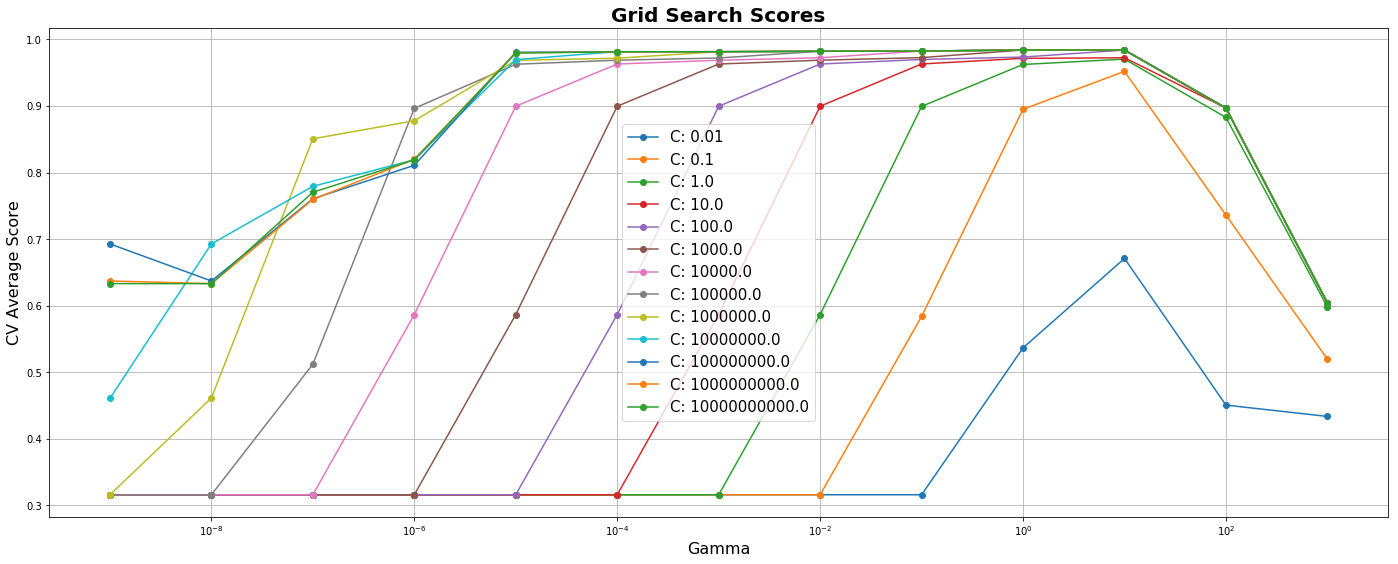

In [10]:
plot_grid_search(top_model.cv_results_,gamma_range,C_range,'Gamma','C')
figure = plt.gcf()
figure.set_size_inches(24, 9)
plt.show()

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


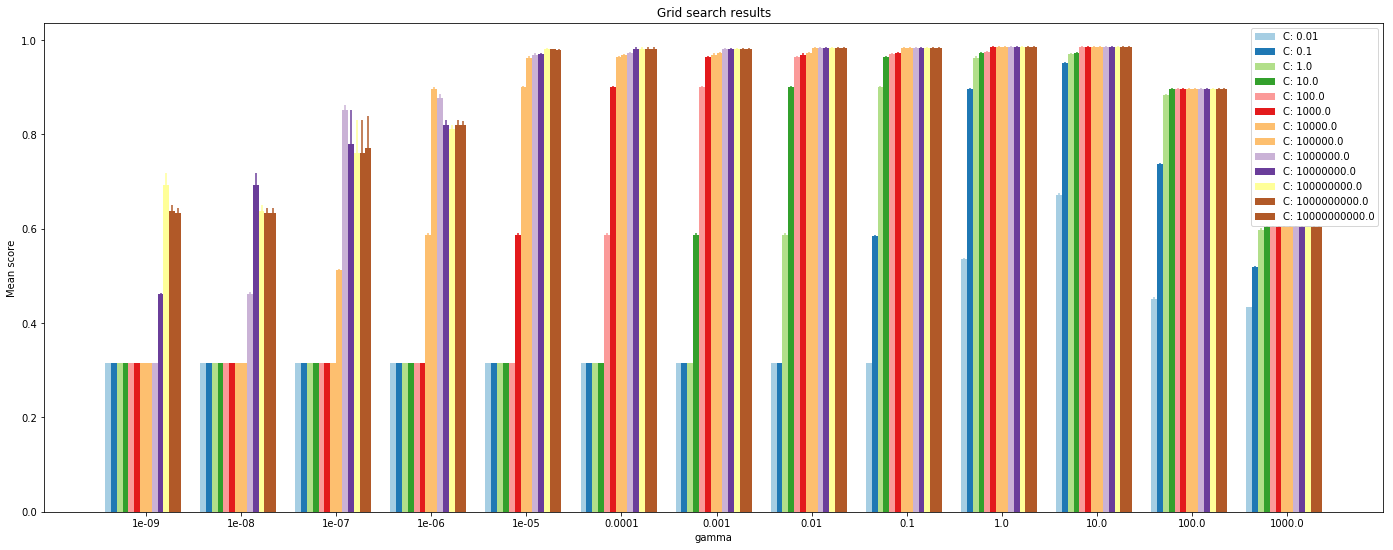

In [11]:
skplot.grid_search(top_model.grid_scores_, change='gamma', kind='bar')
figure = plt.gcf()
figure.set_size_inches(24, 9)
plt.show()

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


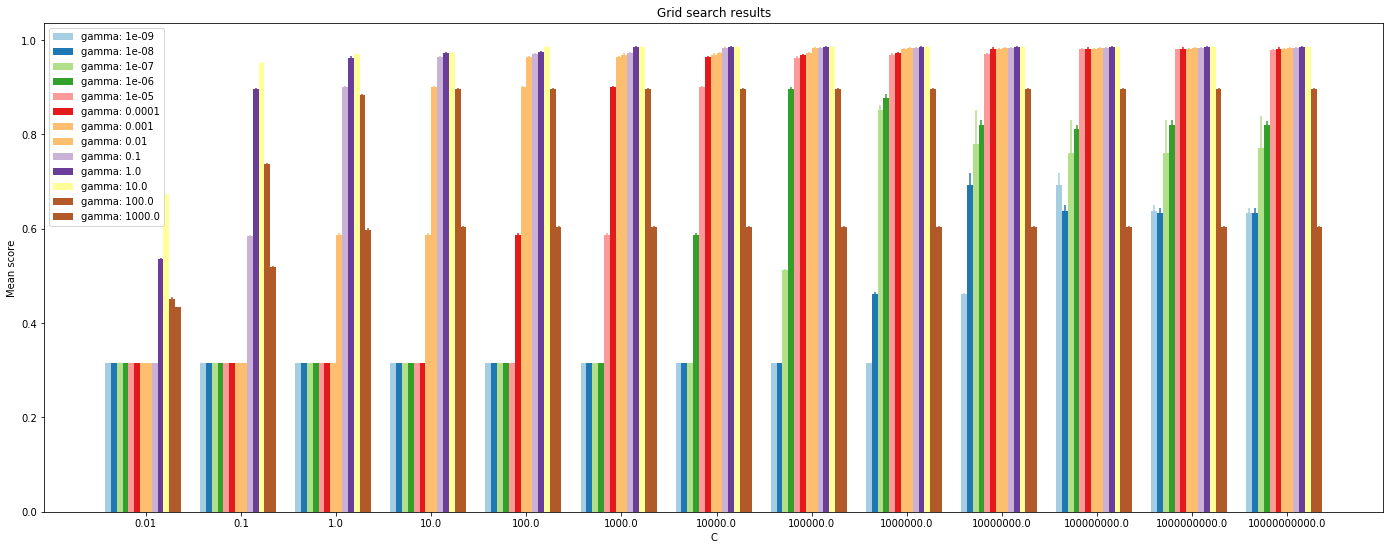

In [12]:
skplot.grid_search(top_model.grid_scores_, change='C', kind='bar')
figure = plt.gcf()
figure.set_size_inches(24, 9)
plt.show()

In [13]:
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=1)
svm_model = svm.SVC(C=top_model.best_params_['C'],gamma=top_model.best_params_['gamma'])
train_sizes = np.linspace(.1, 1.0, 10)
train_sizes, train_scores, test_scores = learning_curve(svm_model, X, y, cv=cv, n_jobs=20, train_sizes=train_sizes)

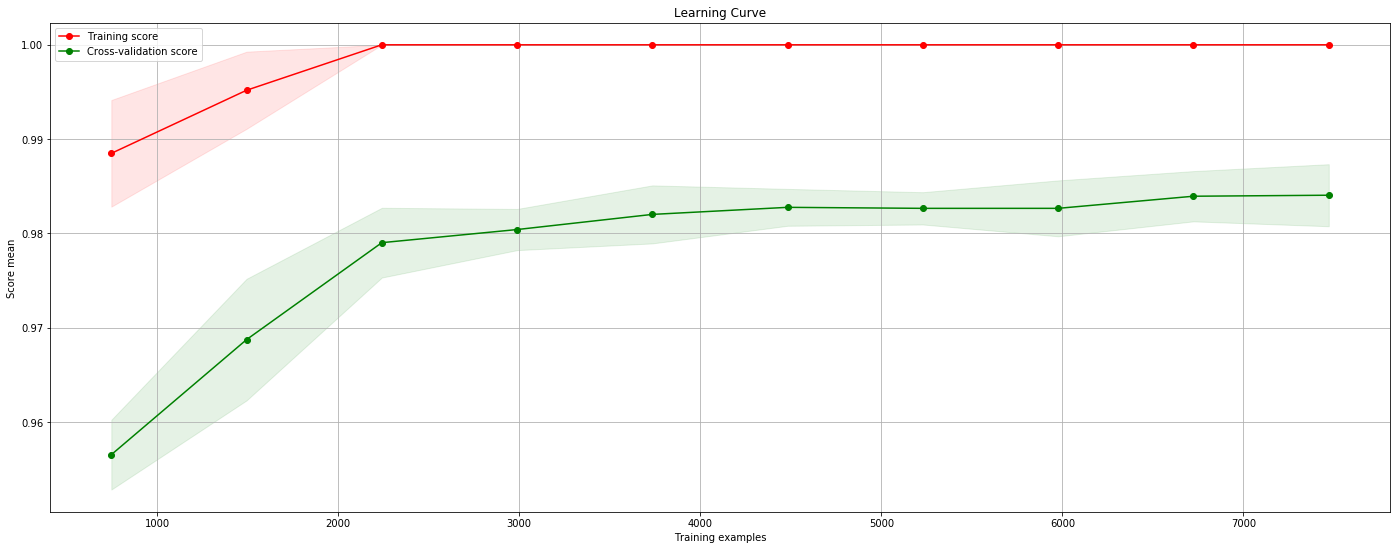

In [14]:
figure = plt.gcf()
figure.set_size_inches(24, 9)
skplot.learning_curve(train_scores, test_scores, train_sizes)
plt.show()